# (실습) 통계 기초

**필수 모듈**

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [6]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정


In [24]:
import platform
import matplotlib as mpl

# 윈도우 설정
if platform.system() == 'Windows':
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = mpl.font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font)
# 우분투/구글 코랩 설정
elif platform.system() == 'Linux':
    # 우분투/구글코랩의 경우 아래 명령문이 최소 한번 실행되어야 함
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    font = "NanumBarunGothic"
    if not any(map(lambda ft: ft.name == font, mpl.font_manager.fontManager.ttflist)):
        mpl.font_manager.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=font)
    plt.rc("axes", unicode_minus=False)

## 데이터 준비

영산강에 설치된 승천보에서 측정한 두 개의 데이터셋이다.

- `chl_a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `flow`: 보에서 방출되는 시간당 방류량 수치 100개

두 데이터셋의 인덱스는 수질(water quality)을 가리킨다.
수질은 높은 숫자일 수록 나쁘다.

In [20]:
chl_a = [51.33023589486804, 51.61994026409811, 53.10779852528434, 53.6491781541815, 54.50135395007981,
         55.56508910797962, 57.0874190358504, 57.925077422523906, 59.19025663191424, 60.652470335939746,
         61.84507598573831, 62.616071885541565, 63.35673453527934, 64.37685243136674, 65.32717609230774,
         66.56712372659406, 67.38194582963806, 67.56436444575445, 67.86825475374323, 69.32160761002876,
         70.57378204428697, 71.27293568105853, 71.76698244481629, 72.73500702066875, 73.16897323883705,
         75.08331442057558, 75.69092081351067, 76.38112253783146, 77.70314248611098, 79.7530476708625,
         81.00398059979959, 81.36278863564027, 83.4553645479718, 83.95646128296693, 85.20788490248762,
         86.85353187005387, 87.9251701357554, 88.07027817618754, 88.281307283802, 88.95403467220915,
         89.34594970805986, 89.96265694017043, 90.2401745561519, 91.79624195635525, 92.2759393770581,
         95.7423935115972, 96.1476593506668, 96.59487404855844, 97.59452991122325, 98.16814782778545,
         98.18937155116436, 98.18937155116436, 99.16484525364815, 101.4083136638404, 101.4876245089924,
         102.85992464036171, 102.75167177920466, 103.83123384292924, 104.36401696514588, 104.36401696514588,
         104.78418320061394, 104.78418320061394, 105.32508412766991, 106.58235554621365, 107.59295578763862,
         108.07276575854497, 110.0149792668759, 111.17487567683182, 111.62824869537782, 112.0455589314226,
         112.0455589314226, 112.61997004839074, 113.34983253106459, 114.40871603230254, 114.2390631261668,
         116.00623564193734, 116.00623564193734, 116.64924870452226, 117.49158837105713, 118.16227413195286,
         118.16227413195286, 118.73057367002345, 118.73057367002345, 119.02861417710817, 120.33575874419247,
         120.95033057304468, 121.66539427816495, 122.9959587555846, 125.82396530558734, 120.30283333333333,
         121.67367674858222, 121.67367674858222, 121.67367674858222, 122.2330862977602, 122.21303485162181,
         122.21303485162181, 122.96035326086958, 124.29445080091534, 125.3090126811594, 124.86294685990336]

In [21]:
flow = [25.214042381360777, 25.202057187425005, 24.581727430555556, 24.202342874783575, 22.951352110745606,
        22.275878327900035, 21.512137496429617, 21.115809145231403, 20.37568581163675, 20.07608141235855,
        19.61516461374696, 19.241547337744162, 19.146230069355063, 18.393687242798332, 18.338889753940766,
        18.10594957392237, 17.774305394431533, 17.537934824902703, 17.21508793361505, 16.969304786579578,
        16.740334439528006, 16.92574972968797, 17.016028367400416, 16.99111657917761, 17.021436333220883,
        17.087980543517535, 16.735437708102133, 16.670667363486654, 16.39464102043581, 16.651588016588033,
        16.78817074074076, 16.665854570741264, 16.635180270863856, 16.523185309749227, 16.35360089869282,
        15.322253850385035, 15.19767953929539, 15.208504995126697, 15.24006091834717, 15.32877035662749,
        15.252843695746522, 14.989748298750547, 15.004168072424642, 14.701718600335244, 14.765307187730961,
        13.598340411692684, 13.630766028633674, 13.560912878787875, 13.285182461873644, 13.278674052396884, 
        13.291697893363168, 13.291697893363168, 13.111556712962965, 13.306904961917562, 13.33832938121048, 
        13.551654693486588, 12.500654851684263, 12.174172890461218, 12.140989167995748, 12.140989167995748, 
        12.150669618894261, 12.150669618894261, 52.000198110547098, 11.66321396396396, 11.739146657250467, 
        11.53856865079365, 11.389279900920032, 11.302402314814822, 12.045153888888896, 12.109730902777784, 
        12.109730902777784, 12.07247469397364, 12.059341787439617, 11.929908234126986, 12.55398399758454, 
        12.891918625356125, 12.891918625356125, 11.726437841530059, 11.632898706896553, 11.641237816764136, 
        11.641237816764136, 11.539965277777778, 11.539965277777778, 11.504154647435898, 11.493780555555553, 
        11.516909013605439, 11.553440393518516, 11.869285714285708, 11.343947482638884, 10.94308611111111, 
        9.892666062801935, 9.892666062801935, 9.892666062801935, 9.85233585858586, 9.862255291005292, 
        9.862255291005292, 9.85028125, 49.364517543859648, 9.186124131944442, 9.191513888888887]

In [22]:
len(chl_a)

100

In [23]:
len(flow)

100

**산점도**

x축을 방류량, y축을 클로로필-A 수치로 지정한 다음 산점도를 그려본다.

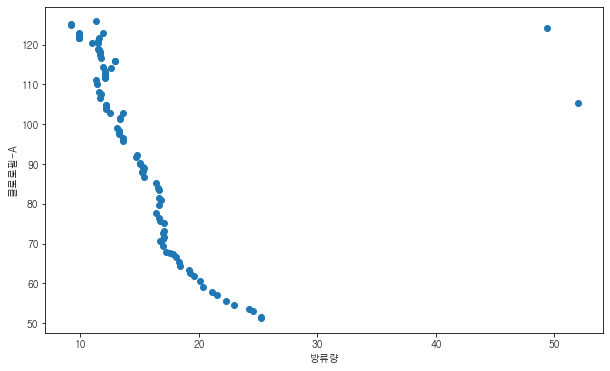

In [25]:
plt.scatter(flow, chl_a)

# 그래프 설정
plt.xlabel("방류량")           # x축 눈금 설명
plt.ylabel("클로로필-A")       # y축 눈금 설명
plt.show()

**이상치**

두 개의 이상치가 존재한다.